# <font color='#026873'> Recommender System for a Medical Supplies Company

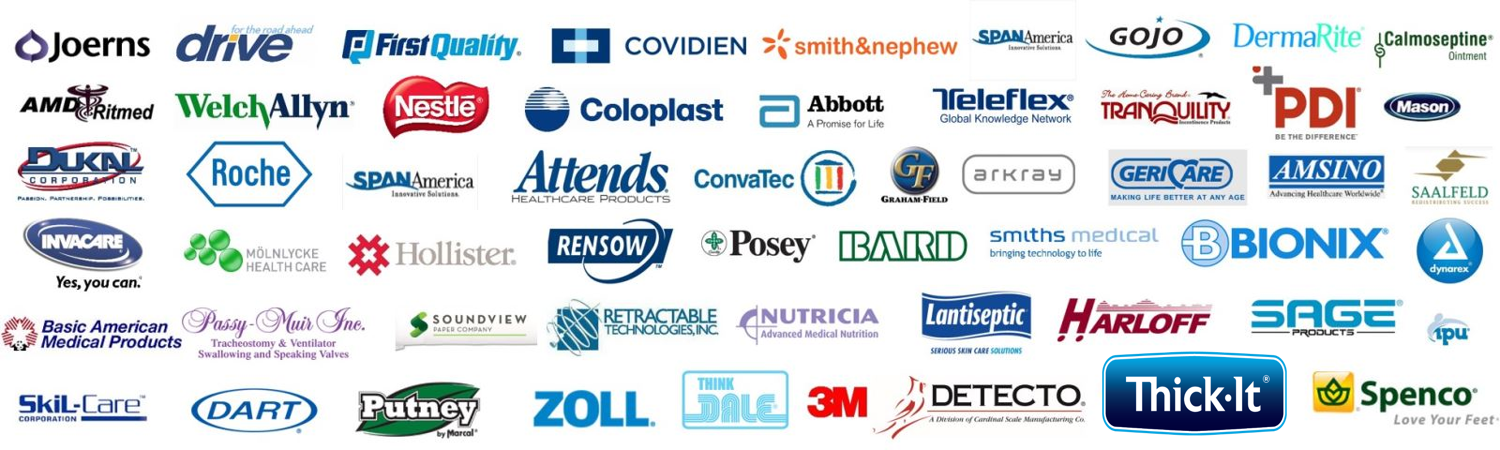

## <font color='#026873'>Project Overview
This project focuses on developing a recommender system for a medical supplies company. The aim is to suggest relevant products to customers based on various criteria, including product descriptions, sales data, and user preferences. The following tasks will be covered:

- **Missing Data**: Handle missing data points to ensure a clean dataset.
- **Popular Products**: Identify the most popular products based on sales volume and dollar amount.
- **Company with Maximum Purchase**: Determine which company has made the most purchases.
- **Popularity-Based Recommender System**: Build a simple recommender system that suggests products based on their popularity.
- **Matrix Factorization**: Implement a recommender system using matrix factorization techniques.
- **Cosine Similarity for Product Descriptions**: Calculate the similarity between products based on their descriptions.

## <font color='#026873'> Requirements

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <font color='#026873'> Import Data

In [5]:
df=pd.read_csv('PBL 5 recommendation data.csv',encoding='latin-1')

## <font color='#026873'> EDA (Exploratory Data Analysis)

In [7]:
df.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

   Customers.last_modified  Customers.customer_type  Orders.id  \
0               1437764306                      0.0       3758   
1               1437764354                      0.0         23   
2               1437764354                      0.0       9531   
3               1437762646                      0.0         29   
4               1437764316                      0.0         30   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   
2                   3         John        Smith       Company1   
3                   4        James     Anderson            NaN   
4                   5      Abraham       Pollak       Company3   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   
2                9531                NaN                    NaN   
3                  29                NaN                   Ebay   
4                  30                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN            57.20   
1                 NaN             USD               NaN            20.00   
2                 NaN             USD               NaN            68.78   
3                 NaN             USD               NaN            19.56   
4                 NaN             USD               NaN            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   
2             NaN                 NaN         

In [8]:
df.shape

(4194, 181)

<Axes: >

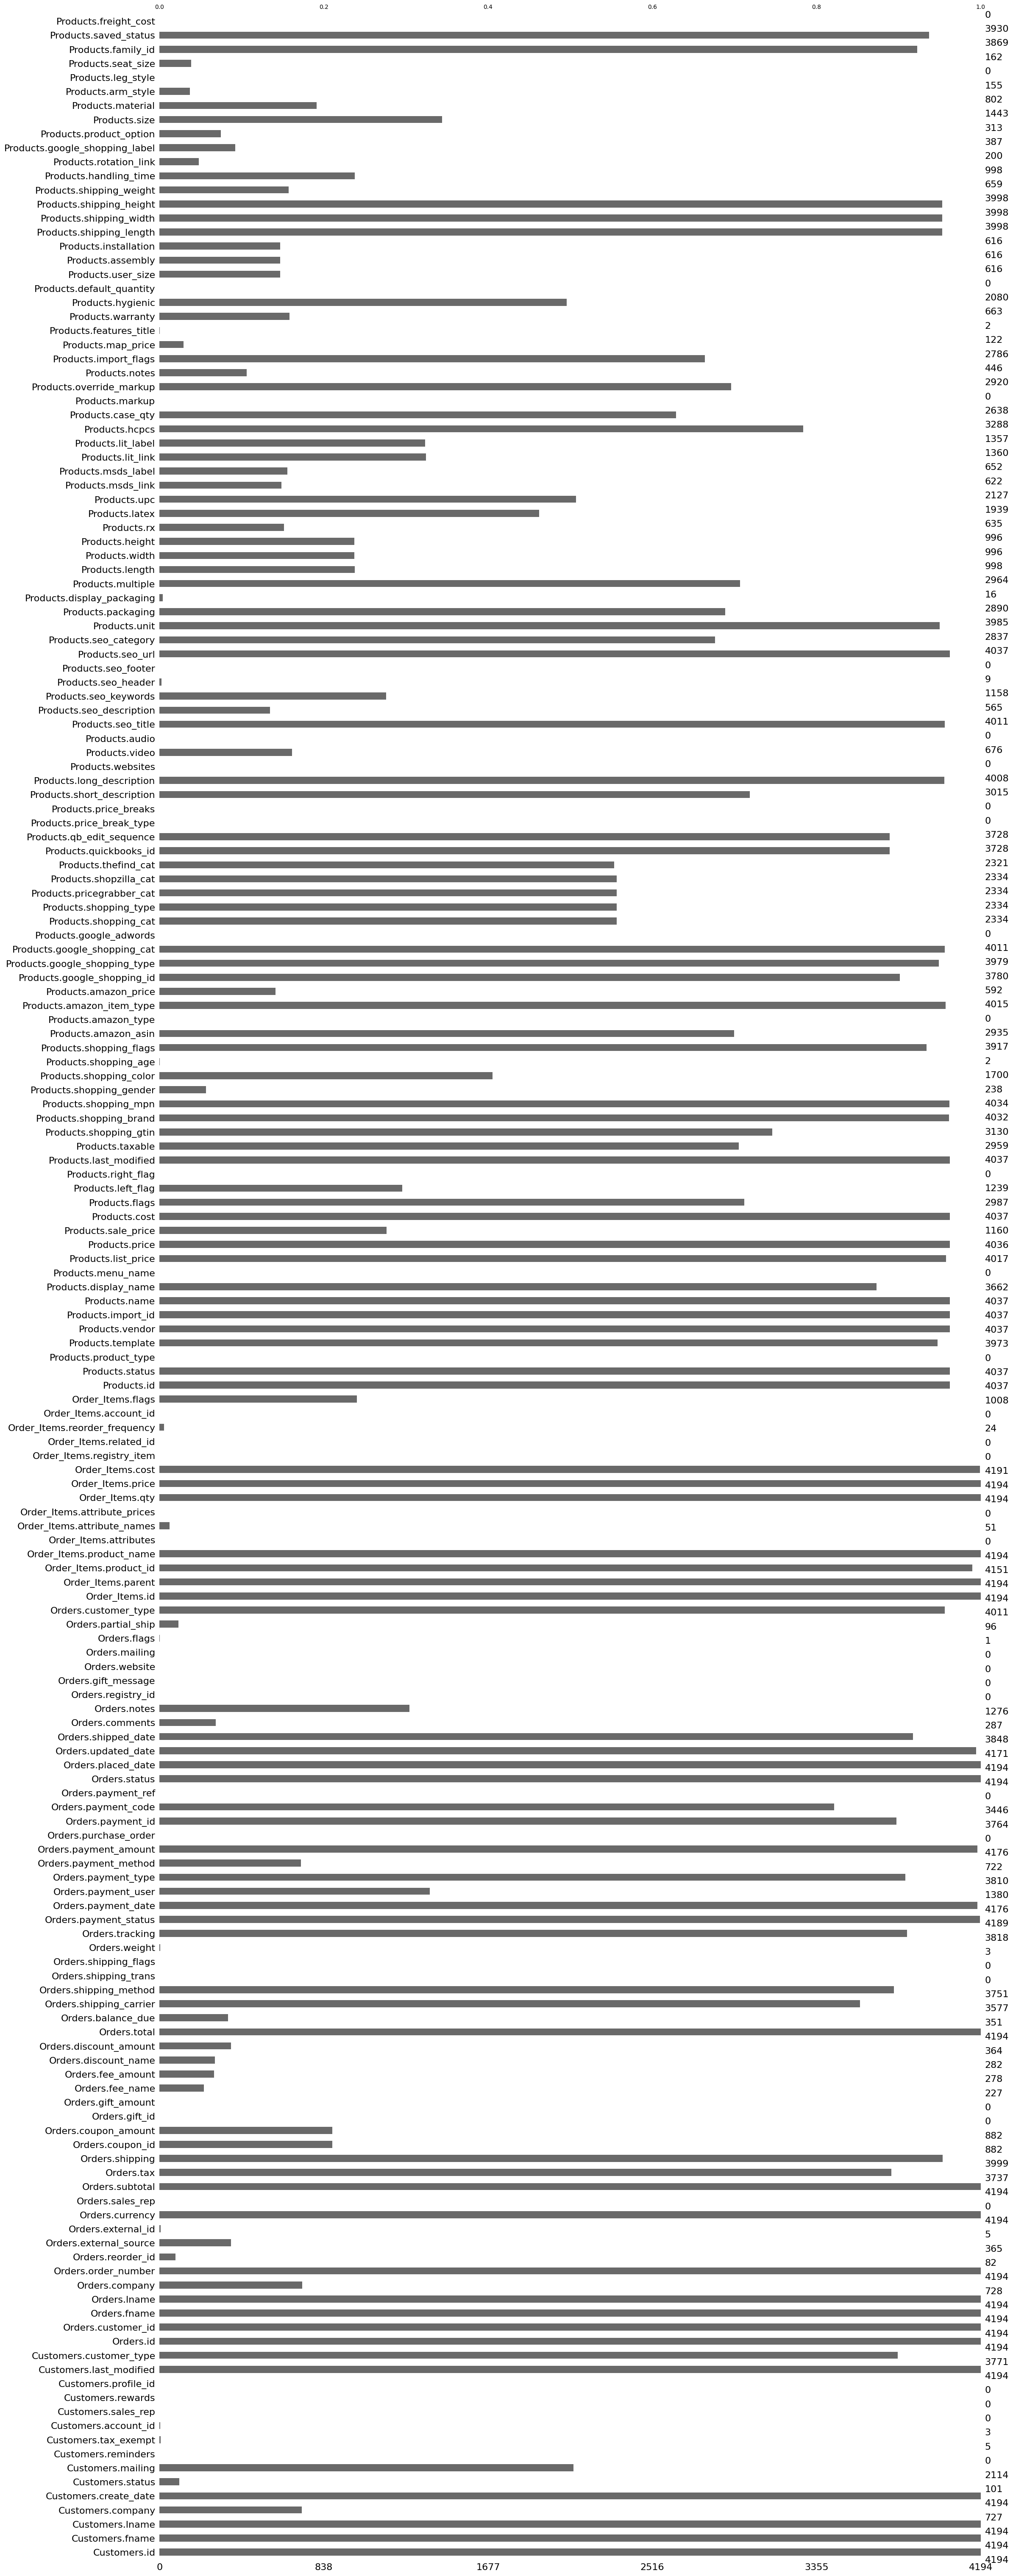

In [9]:
import missingno as msng
msng.bar(df)

## <font color='#026873'> Handling Missing Data

In [11]:
df=df.dropna(axis=1,how="all")

In [12]:
df.shape

(4194, 147)

In [13]:
df.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.tax_exempt  Customers.account_id  Customers.last_modified  \
0                   NaN                   NaN               1437764306   
1                   NaN                   NaN               1437764354   
2                   NaN                   NaN               1437764354   
3                   NaN                   NaN               1437762646   
4                   NaN                   NaN               1437764316   

   Customers.customer_type  Orders.id  Orders.customer_id Orders.fname  \
0                      0.0       3758                 797      Christy   
1                      0.0         23                   3         John   
2                      0.0       9531                   3         John   
3                      0.0         29                   4        James   
4                      0.0         30                   5      Abraham   

  Orders.lname Orders.company Orders.order_number  Orders.reorder_id  \
0         Dill       Company0                3758                NaN   
1        Smith       Company1                  23                NaN   
2        Smith       Company1                9531                NaN   
3     Anderson            NaN                  29                NaN   
4       Pollak       Company3                  30                NaN   

  Orders.external_source  Orders.external_id Orders.currency  Orders.subtotal  \
0                    NaN                 NaN             USD            57.20   
1                    NaN                 NaN             USD            20.00   
2                    NaN                 NaN             USD            68.78   
3                   Ebay                 NaN             USD            19.56   
4                    NaN                 NaN             USD            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

  Orders.fee_name  Orders.fee_amount Orders.discount_name  \
0             NaN                NaN                  NaN   
1             NaN                NaN                  NaN   
2             NaN                NaN                  NaN   
3             NaN               0.04                  NaN   
4             NaN                NaN                  NaN   

   Orders.discount_amount  Orders.total  Orders.balance_due  \
0                     NaN         64.29                 NaN   
1                     NaN         29.99                 NaN   
2                     NaN         78.73                 NaN   
3                     NaN         29.55                 NaN   
4                     NaN         46.00                 NaN   

  Orders.shipping_carrier Orders.shipping_method  Orders.weight  \
0                   fedex              11|Ground            NaN   
1                   fedex              11|Ground            Na

In [14]:
df['Customers_Full_Name']=df['Customers.fname']+df['Customers.lname']

In [15]:
df.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.tax_exempt  Customers.account_id  Customers.last_modified  \
0                   NaN                   NaN               1437764306   
1                   NaN                   NaN               1437764354   
2                   NaN                   NaN               1437764354   
3                   NaN                   NaN               1437762646   
4                   NaN                   NaN               1437764316   

   Customers.customer_type  Orders.id  Orders.customer_id Orders.fname  \
0                      0.0       3758                 797      Christy   
1                      0.0         23                   3         John   
2                      0.0       9531                   3         John   
3                      0.0         29                   4        James   
4                      0.0         30                   5      Abraham   

  Orders.lname Orders.company Orders.order_number  Orders.reorder_id  \
0         Dill       Company0                3758                NaN   
1        Smith       Company1                  23                NaN   
2        Smith       Company1                9531                NaN   
3     Anderson            NaN                  29                NaN   
4       Pollak       Company3                  30                NaN   

  Orders.external_source  Orders.external_id Orders.currency  Orders.subtotal  \
0                    NaN                 NaN             USD            57.20   
1                    NaN                 NaN             USD            20.00   
2                    NaN                 NaN             USD            68.78   
3                   Ebay                 NaN             USD            19.56   
4                    NaN                 NaN             USD            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

  Orders.fee_name  Orders.fee_amount Orders.discount_name  \
0             NaN                NaN                  NaN   
1             NaN                NaN                  NaN   
2             NaN                NaN                  NaN   
3             NaN               0.04                  NaN   
4             NaN                NaN                  NaN   

   Orders.discount_amount  Orders.total  Orders.balance_due  \
0                     NaN         64.29                 NaN   
1                     NaN         29.99                 NaN   
2                     NaN         78.73                 NaN   
3                     NaN         29.55                 NaN   
4                     NaN         46.00                 NaN   

  Orders.shipping_carrier Orders.shipping_method  Orders.weight  \
0                   fedex              11|Ground            NaN   
1                   fedex              11|Ground            Na

## <font color='#026873'> Most Popular Product

In [17]:
def popularity(column_name):
    most_popular=df.groupby(column_name).agg({
        'Order_Items.qty':[np.size,np.sum,np.mean],
        'Order_Items.price':[np.sum,np.mean]
    })
    most_popular['Total Sale per Product']=most_popular["Order_Items.qty"]["sum"]*most_popular["Order_Items.price"]["mean"]
    return most_popular

In [18]:
most_popular_products=popularity('Order_Items.product_name')

### <font color='#026873'> Most Popular Product by Total Sale Amount in Dollar
The most popular product, based on total revenue, is **Disposable Emergency Blanket, Gray, Not Applicable**.

In summary, **Disposable Emergency Blanket, Gray, Not Applicable** generates the highest total revenue among all products.

In [20]:
most_popular_products=most_popular_products.sort_values('Total Sale per Product',ascending=False)
most_popular_products.head()

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   

                                                   Order_Items.price  \
                                                                 sum   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable            484.54   
Medline MoliCare Super Plus Disposable Adult Di...           2902.30   
Medline Deluxe Aluminum Transport Chair With Ha...           5824.56   
Sanitary Pads with Adhesive & Wings                            84.64   
2-Ply Tissue/Poly Professional Towels, White, N...             50.54   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   34.610000   
Medline MoliCare Super Plus Disposable Adult Di...   54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...  126.620870   
Sanitary Pads with Adhesive & Wings                  42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...   25.270000   

                                                   Total Sale per Product  
                                                                           
Order_Items.product_name                                                   
Disposable Emergency Blanket, Gray, Not Applicable           10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...            8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...            5951.180870  
Sanitary Pads with Adhesive & Wings                           5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...            5559.400000

### <font color='#026873'> Most Popular Product by Total Count of Ordered Products
The most popular product, based on the number of times it was ordered, is **TruTemp**.

In summary, **TruTemp** has the highest number of ordered items.

In [22]:
most_popular_products=most_popular_products.sort_values(('Order_Items.qty','sum'),ascending=False)
most_popular_products.head()

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   

                                                   Order_Items.price  \
                                                                 sum   
Order_Items.product_name                                               
TruTemp                                                         2.99   
Disposable Emergency Blanket, Gray, Not Applicable            484.54   
2-Ply Tissue/Poly Professional Towels, White, N...             50.54   
Medline MoliCare Super Plus Disposable Adult Di...           2902.30   
Sanitary Pads with Adhesive & Wings                            84.64   

                                                               \
                                                         mean   
Order_Items.product_name                                        
TruTemp                                              2.990000   
Disposable Emergency Blanket, Gray, Not Applicable  34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...  25.270000   
Medline MoliCare Super Plus Disposable Adult Di...  54.760377   
Sanitary Pads with Adhesive & Wings                 42.320000   

                                                   Total Sale per Product  
                                                                           
Order_Items.product_name                                                   
TruTemp                                                       1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable           10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...            5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...            8980.701887  
Sanitary Pads with Adhesive & Wings                           5628.560000

## <font color='#026873'> Company With Maximum Purchase
When analyzing the data for the highest revenue and the highest ordered count, **Company59** emerges as the top-performing company in both categories.

In [24]:
most_popular_company=popularity('Orders.company')
most_popular_company=most_popular_company.sort_values(('Total Sale per Product'),ascending=False)
most_popular_company.head()

Order_Items.qty                 Order_Items.price             \
                          size  sum       mean               sum       mean   
Orders.company                                                                
Company59                   15  381  25.400000            519.15  34.610000   
Company343                   2  133  66.500000             84.64  42.320000   
Company159                  11   47   4.272727            880.64  80.058182   
Company281                   4   43  10.750000            251.64  62.910000   
Company145                  27   27   1.000000           2696.38  99.865926   

               Total Sale per Product  
                                       
Orders.company                         
Company59                13186.410000  
Company343                5628.560000  
Company159                3762.734545  
Company281                2705.130000  
Company145                2696.380000

In [25]:
most_popular_company=most_popular_company.sort_values(('Order_Items.qty','sum'),ascending=False)
most_popular_company.head()

Order_Items.qty                 Order_Items.price             \
                          size  sum       mean               sum       mean   
Orders.company                                                                
Company59                   15  381  25.400000            519.15  34.610000   
Company343                   2  133  66.500000             84.64  42.320000   
Company86                   11  105   9.545455            202.40  18.400000   
Company130                  17   71   4.176471            482.50  28.382353   
Company159                  11   47   4.272727            880.64  80.058182   

               Total Sale per Product  
                                       
Orders.company                         
Company59                13186.410000  
Company343                5628.560000  
Company86                 1932.000000  
Company130                2015.147059  
Company159                3762.734545

## <font color='#026873'> Top Shopping Customers

When analyzing the data for the highest revenue, top customer is **United promotionpromotion**

In [27]:
top_customers=popularity('Customers_Full_Name')
top_customers=top_customers.sort_values(('Order_Items.qty','sum'),ascending=False)
top_customers.head()

Order_Items.qty                  Order_Items.price  \
                                     size  sum        mean               sum   
Customers_Full_Name                                                            
United promotionpromotion               2  505  252.500000            136.85   
RoseAnnReyes                           10  300   30.000000            346.10   
DavidOconnell                           2  220  110.000000             50.54   
Burten Leibowitz                        2  133   66.500000             84.64   
EleniVentsanos                         11  105    9.545455            202.40   

                                  Total Sale per Product  
                             mean                         
Customers_Full_Name                                       
United promotionpromotion  68.425              34554.625  
RoseAnnReyes               34.610              10383.000  
DavidOconnell              25.270               5559.400  
Burten Leibowitz           42.320               5628.560  
EleniVentsanos             18.400               1932.000

## <font color='#026873'> The Most Shopped Brand
When analyzing the data for the highest revenue and the highest ordered count, **MEDLINE** emerges as the top-performing product brand in both categories.

In [29]:
top_brands=popularity('Products.shopping_brand')

In [30]:
top_brands=top_brands.sort_values(('Order_Items.qty','sum'),ascending=False)
top_brands.head()

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
CanDo&reg;                               113   182  1.610619   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price              \
                                           sum        mean   
Products.shopping_brand                                      
MEDLINE                              159449.75   59.674308   
Drive Medical                         64402.35  120.378224   
HARTMANN-CONCO INC                     7178.91   58.843525   
CanDo&reg;                             3439.58   30.438761   
Fabrication Enterprises Inc.           4248.29   49.979882   

                             Total Sale per Product  
                                                     
Products.shopping_brand                              
MEDLINE                               294731.405408  
Drive Medical                          68254.453178  
HARTMANN-CONCO INC                     19065.301967  
CanDo&reg;                              5539.854513  
Fabrication Enterprises Inc.            5597.746824

In [31]:
top_brands=top_brands.sort_values(('Total Sale per Product'),ascending=False)
top_brands.head()

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
Wenzelite                                 36    48  1.333333   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price              \
                                           sum        mean   
Products.shopping_brand                                      
MEDLINE                              159449.75   59.674308   
Drive Medical                         64402.35  120.378224   
HARTMANN-CONCO INC                     7178.91   58.843525   
Wenzelite                              6463.25  179.534722   
Fabrication Enterprises Inc.           4248.29   49.979882   

                             Total Sale per Product  
                                                     
Products.shopping_brand                              
MEDLINE                               294731.405408  
Drive Medical                          68254.453178  
HARTMANN-CONCO INC                     19065.301967  
Wenzelite                               8617.666667  
Fabrication Enterprises Inc.            5597.746824

## <font color='#026873'> The Most Popular Payment Method
When analyzing the data for  the highest ordered count, **authorize.net** emerges as the top-performing payment method.

In [33]:
top_payment_types=popularity('Orders.payment_type')

In [34]:
top_payment_types=top_payment_types.sort_values(('Order_Items.qty','sum'),ascending=False)
top_payment_types

Order_Items.qty                 Order_Items.price  \
                               size   sum      mean               sum   
Orders.payment_type                                                     
authorize.net                  3454  6673  1.931963         228738.73   
paypal                          318   510  1.603774          15689.52   
Credit Card                      32    71  2.218750           1820.04   
Check                             5    16  3.200000            672.85   
Cash                              1     2  2.000000            115.98   

                                Total Sale per Product  
                           mean                         
Orders.payment_type                                     
authorize.net         66.224299          441914.749650  
paypal                49.338113           25162.437736  
Credit Card           56.876250            4038.213750  
Check                134.570000            2153.120000  
Cash                 115.980000             231.960000

## <font color='#026873'> The Most Popular Shipping Method 
When analyzing the data for  the highest ordered count, **11|Ground** emerges as the top-performing shipping method.

In [36]:
top_payment_types=popularity('Orders.shipping_method')

In [37]:
top_payment_types=top_payment_types.sort_values(('Order_Items.qty','sum'),ascending=False)
top_payment_types

Order_Items.qty                   Order_Items.price  \
                                     size   sum        mean               sum   
Orders.shipping_method                                                          
11|Ground                            2474  4446    1.797090         154209.56   
0|Standard Shipping                   902  1188    1.317073          57676.53   
-1|Free Shipping                      267  1085    4.063670          33563.70   
SOUTHWESTERN MOTOR TRNAS                1   200  200.000000             25.27   
0|Free Shipping                        91    97    1.065934          12987.16   
NATIONAL DELIVERY                       6    54    9.000000            253.99   
MEDTRANS                                1    30   30.000000             34.61   
LAND AIR OF NEW ENGLAND                 1    10   10.000000            265.33   
HOWARD'S EXPRESS, INC.                  2     4    2.000000            295.99   
WILSON TRUCKING CORP                    2     4    2.000000            328.89   
ROADWAY EXPRESS                         1     3    3.000000            165.00   
FEDERAL EXPRESS CORP.                   1     2    2.000000             13.84   
NATIONAL DELIVERY SYSTEMS               1     2    2.000000            105.92   
INTERNATIONAL FEDEX                     1     1    1.000000             58.20   

                                      Total Sale per Product  
                                 mean                         
Orders.shipping_method                                        
11|Ground                   62.332078          277128.417041  
0|Standard Shipping         63.942938           75964.210244  
-1|Free Shipping           125.706742          136391.814607  
SOUTHWESTERN MOTOR TRNAS    25.270000            5054.000000  
0|Free Shipping            142.716044           13843.456264  
NATIONAL DELIVERY           42.331667            2285.910000  
MEDTRANS                    34.610000            1038.300000  
LAND AIR OF NEW ENGLAND    265.330000            2653.300000  
HOWARD'S EXPRESS, INC.     147.995000             591.980000  
WILSON TRUCKING CORP       164.445000             657.780000  
ROADWAY EXPRESS            165.000000             495.000000  
FEDERAL EXPRESS CORP.       13.840000              27.680000  
NATIONAL DELIVERY SYSTEMS  105.920000             211.840000  
INTERNATIONAL FEDEX         58.200000              58.200000

## <font color='#026873'> Recommender System Using Matrix Factorization 

In [39]:
matrix=df.pivot_table(index='Orders.customer_id',columns='Order_Items.product_name',values='Order_Items.qty').fillna(0)
matrix.sample(10)

Order_Items.product_name   BUCKET, REPLACEMENT FOR MDS89668XW  \
Orders.customer_id                                              
1132                                                      0.0   
2499                                                      0.0   
193                                                       0.0   
2019                                                      0.0   
3726                                                      0.0   
957                                                       0.0   
1559                                                      0.0   
455                                                       0.0   
3526                                                      0.0   
1244                                                      0.0   

Order_Items.product_name  1 Box Of Medline Commode Liners with Absorbent Pad  \
Orders.customer_id                                                             
1132                                                                    0.0    
2499                                                                    0.0    
193                                                                     0.0    
2019                                                                    0.0    
3726                                                                    0.0    
957                                                                     0.0    
1559                                                                    0.0    
455                                                                     0.0    
3526                                                                    0.0    
1244                                                                    0.0    

Order_Items.product_name  1 Pad of CURAD Mediplast Wart Pad  \
Orders.customer_id                                            
1132                                                    0.0   
2499                                                    0.0   
193                                                     0.0   
2019                                                    0.0   
3726                                                    0.0   
957                                                     0.0   
1559                                                    0.0   
455                                                     0.0   
3526                                                    0.0   
1244                                                    0.0   

Order_Items.product_name  1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large  \
Orders.customer_id                                                                          
1132                                                                    0.0                 
2499                                                                    0.0                 
193                                                                     0.0                 
2019                                                                    0.0                 
3726                                                                    0.0                 
957                                                                     0.0                 
1559                                                                    0.0                 
455                                                                     0.0                 
3526                                                                    0.0                 
1244                                                                    0.0                 

Order_Items.product_name  1/2" self-adhesive hook material, 25 yard dispenser box, white  \
Orders.customer_id                                                                         
1132                                                                    0.0                
2499                                                                    0.0                
193             

In [40]:
matrix_popularity=popularity('Order_Items.product_name')
matrix_popularity.head()

Order_Items.qty           \
                                                              size sum mean   
Order_Items.product_name                                                      
 BUCKET, REPLACEMENT FOR MDS89668XW                              1   1  1.0   
1 Box Of Medline Commode Liners with Absorbent Pad               1   2  2.0   
1 Pad of CURAD Mediplast Wart Pad                                1   1  1.0   
1-Ply Blockade AngelStat Surgical Gowns, Ceil B...               1   1  1.0   
1/2" self-adhesive hook material, 25 yard dispe...               1   1  1.0   

                                                   Order_Items.price          \
                                                                 sum    mean   
Order_Items.product_name                                                       
 BUCKET, REPLACEMENT FOR MDS89668XW                            44.00   44.00   
1 Box Of Medline Commode Liners with Absorbent Pad             18.99   18.99   
1 Pad of CURAD Mediplast Wart Pad                               4.88    4.88   
1-Ply Blockade AngelStat Surgical Gowns, Ceil B...            235.05  235.05   
1/2" self-adhesive hook material, 25 yard dispe...             23.25   23.25   

                                                   Total Sale per Product  
                                                                           
Order_Items.product_name                                                   
 BUCKET, REPLACEMENT FOR MDS89668XW                                 44.00  
1 Box Of Medline Commode Liners with Absorbent Pad                  37.98  
1 Pad of CURAD Mediplast Wart Pad                                    4.88  
1-Ply Blockade AngelStat Surgical Gowns, Ceil B...                 235.05  
1/2" self-adhesive hook material, 25 yard dispe...                  23.25

In [41]:
matrix_popularity=matrix_popularity.sort_values(('Order_Items.qty','sum'),ascending=False)
matrix_popularity.head(10)

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   
Corrugated Aerosol Tubing                                       13  110   
Disposable Emergency Blanket, Not Applicable                     4   91   
Silent Knight Pill Crusher Pouches                              48   72   
Protect Extra Protective Underwear, 56.00                       14   69   
Medline Emesis/Barf Bags, throw up bags, Blue -...              47   58   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   
Corrugated Aerosol Tubing                             8.461538   
Disposable Emergency Blanket, Not Applicable         22.750000   
Silent Knight Pill Crusher Pouches                    1.500000   
Protect Extra Protective Underwear, 56.00             4.928571   
Medline Emesis/Barf Bags, throw up bags, Blue -...    1.234043   

                                                   Order_Items.price  \
                                                                 sum   
Order_Items.product_name                                               
TruTemp                                                         2.99   
Disposable Emergency Blanket, Gray, Not Applicable            484.54   
2-Ply Tissue/Poly Professional Towels, White, N...             50.54   
Medline MoliCare Super Plus Disposable Adult Di...           2902.30   
Sanitary Pads with Adhesive & Wings                            84.64   
Corrugated Aerosol Tubing                                     228.45   
Disposable Emergency Blanket, Not Applicable                  138.44   
Silent Knight Pill Crusher Pouches                           1639.53   
Protect Extra Protective Underwear, 56.00                     360.50   
Medline Emesis/Barf Bags, throw up bags, Blue -...            725.55   

                                                               \
                                                         mean   
Order_Items.product_name                                        
TruTemp                                              2.990000   
Disposable Emergency Blanket, Gray, Not Applicable  34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...  25.270000   
Medline MoliCare Super Plus Disposable Adult Di...  54.760377   
Sanitary Pads with Adhesive & Wings                 42.320000   
Corrugated Aerosol Tubing                           17.573077   
Disposable Emergency Blanket, Not Applicable        34.610000   
Silent Knight Pill Crusher Pouches                  34.156875   
Protect Extra Protective Underwear, 56.00           25.750000   
Medline Emesis/Barf Bags, throw up bags, Blue -...  15.437234   

                                                   Total Sale per Product  
                                                                           
Order_Items.product_name                                                   
TruTemp                                                       1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable           10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   

In [42]:
def correlated_products(product_name):
    similar_products=matrix[product_name]
    similar_products=matrix.corrwith(similar_products)
    similar_products=similar_products.dropna()
    similar_products=similar_products.sort_values(ascending=False)
    similar_products_df=pd.DataFrame(similar_products,columns=['similarity'])
    return similar_products_df

###  <font color='#026873'> TruTemp Similar Product

If someone already bought TruTemp, these customers has a tendency to buy **Phlebotomy Sharps Containers, Red, 1.000 QT**. 

Therefore **Phlebotomy Sharps Containers, Red, 1.000 QT** product should be recommended customers who **bought TruTemp**.

In [44]:
product_TruTemp=correlated_products('TruTemp')
product_TruTemp.head()

similarity
Order_Items.product_name                                      
TruTemp                                               1.000000
Phlebotomy Sharps Containers, Red, 1.000 QT           0.707028
CanDo&reg; Latex Free Exercise Band - 50 yard r...   -0.000328
2-Ply Tissue/Poly Professional Towels, White, N...   -0.000328
CURAD Stretch Vinyl Exam Gloves, Medium              -0.000328

###  <font color='#026873'> Disposable Emergency Blanket Similar Product

If someone already bought Disposable Emergency Blanket, Gray, Not Applicable, these customers has a tendency to buy **Disposable Emergency Blanket, Not Applicable, Disposable Polypropylene Fitted Stretcher Sheets, Blue, Not Applicable**. 

Therefore **Disposable Emergency Blanket, Not Applicable and Disposable Polypropylene Fitted Stretcher Sheets, Blue, Not Applicable** products should be recommended customers who **bought Disposable Emergency Blanket, Gray, Not Applicable**.

In [46]:
product_Disposable=correlated_products('Disposable Emergency Blanket, Gray, Not Applicable')
product_Disposable.head()

similarity
Order_Items.product_name                                      
Disposable Emergency Blanket, Gray, Not Applicable    1.000000
Disposable Emergency Blanket, Not Applicable          0.830068
Disposable Polypropylene Fitted Stretcher Sheet...    0.054738
TruTemp                                              -0.000545
Ionto+ Plus Hi-Per Iontophoresis electrodes - b...   -0.000545

###  <font color='#026873'> Medline Similar Product

If someone already bought Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size, these customers has a tendency to buy **MoliCare Disposable Super Plus Briefs, Medium/Large and MoliCare Super Plus Adult Disposable Incontinent Briefs Size: Medium/Large**. 

Therefore **MoliCare Disposable Super Plus Briefs, Medium/Large and MoliCare Super Plus Adult Disposable Incontinent Briefs Size: Medium/Large** products should be recommended customers who **bought Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size**.

In [48]:
product_Medline=correlated_products('Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size')
product_Medline.head()

similarity
Order_Items.product_name                                      
Medline MoliCare Super Plus Disposable Adult Di...    1.000000
MoliCare Disposable Super Plus Briefs, Medium/L...    0.702622
MoliCare Super Plus Adult Disposable Incontinen...    0.415104
MoliCare Super Plus Adult Disposable Incontinen...    0.246556
Molicare Briefs, 27"-56"                              0.070772

###  <font color='#026873'> Silent Knight Pill Crusher Pouches Similar Product

If someone already bought Silent Knight Pill Crusher Pouches, these customers has a tendency to buy **Medline Silent Knight Pill Crusher, 200 pouches included**. 

Therefore **Medline Silent Knight Pill Crusher, 200 pouches included** product should be recommended customers who **bought Silent Knight Pill Crusher Pouches**.

In [50]:
product_Corrugated=correlated_products('Silent Knight Pill Crusher Pouches')
product_Corrugated.head()

similarity
Order_Items.product_name                                      
Silent Knight Pill Crusher Pouches                    1.000000
Medline Silent Knight Pill Crusher, 200 pouches...    0.331074
Medline Silent Knight Pill Crusher                    0.167940
Non-Sterile Graduated Plastic Medicine Cups           0.149817
Remedy Basics No-Rinse Cleansing Spray, 4.000 OZ      0.125709

###  <font color='#026873'> Protect Extra Protective Underwear Similar Product

If someone already bought Protect Extra Protective Underwear, these customers has a tendency to buy **Aluminum Rollator with Fold Up and Removable Back Support and Padded Seat** and **CURAD Transparent Adhesive Tape, Transparent** and **Protect Extra Protective Underwear, Large** and **Medline Reachers, Blue**. 

Therefore **Aluminum Rollator with Fold Up and Removable Back Support and Padded Seat** and **CURAD Transparent Adhesive Tape, Transparent** and **Protect Extra Protective Underwear, Large** and **Medline Reachers, Blue** products should be recommended customers who **bought Protect Extra Protective Underwear, 56.00**.

In [52]:
product_protection=correlated_products('Protect Extra Protective Underwear, 56.00')
product_protection.head()

similarity
Order_Items.product_name                                      
Protect Extra Protective Underwear, 56.00             1.000000
Aluminum Rollator with Fold Up and Removable Ba...    0.863570
CURAD Transparent Adhesive Tape, Transparent          0.863570
Protect Extra Protective Underwear, Large             0.772282
Medline Reachers, Blue                                0.287082

###  <font color='#026873'> Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack Similar Product

If someone already bought Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack, these customers has a tendency to buy **Disposable Plastic Drinking Cups, Clear with Black Graduations, 10.000 OZ** and **Disposable Plastic Drinking Cups, Clear with Black Graduations, 10.000 OZ**. 

Therefore **Disposable Plastic Drinking Cups, Clear with Black Graduations, 10.000 OZ** and **Disposable Plastic Drinking Cups, Clear with Black Graduations, 10.000 OZ** product should be recommended customers who **bought Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack**.

In [54]:
product_Medline_Emesis=correlated_products('Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack')
product_Medline_Emesis.head()

similarity
Order_Items.product_name                                      
Medline Emesis/Barf Bags, throw up bags, Blue -...    1.000000
Disposable Plastic Drinking Cups, Clear with Bl...    0.227373
Retail Packaged Underpads                             0.227373
TruTemp                                              -0.002066
Vinyl Innerspring Homecare Mattresses, Misty Green   -0.002066

## <font color='#026873'> Cosine Similarity

In [87]:
product_descriptions=pd.DataFrame()
product_descriptions['Product Name']=df['Products.name']
product_descriptions['Description']=df['Products.long_description']
product_descriptions.head()

Product Name  \
0                  Basic Steel Rollators,Green   
1                           Urinary Drain Bags   
2  SensiCare Nitrile Exam Gloves,Blue,XX-Large   
3                  Basket for 2-Button Walkers   
4                        TENS 3000 Analog Unit   

                                         Description  
0  classically designed value priced constructed ...  
1  only medline drain bags have a slide tap for e...  
2  sensicare nitrile exam gloves feature dependab...  
3  this wire basket attaches to almost any walker...  
4  the tens  tm analog unit uses a microprocessor...

In [89]:
product_descriptions=product_descriptions.dropna()
product_descriptions = product_descriptions.drop_duplicates(subset='Product Name', keep='first')

In [93]:
product_descriptions['Description'][0]

'classically designed value priced constructed of a durable powdercoated steel comes standard with convenient storage bag under the seat'

In [95]:
from bs4 import BeautifulSoup

def clean_html(text):
    if isinstance(text,str):
        soup=BeautifulSoup(text,'html.parser')
        return soup.get_text(separator=' ',strip=True)
    return ''


In [97]:
product_descriptions['Description']=product_descriptions['Description'].apply(clean_html)

In [99]:
product_descriptions['Description']=product_descriptions['Description'].str.lower()
product_descriptions['Description']=product_descriptions['Description'].str.replace('[^\w\s]','',regex=True)
product_descriptions['Description']=product_descriptions['Description'].str.replace('[\d+]','',regex=True)
product_descriptions['Description']=product_descriptions['Description'].str.replace('[\n]','',regex=True)
product_descriptions['Description']=product_descriptions['Description'].str.replace('[\r]','',regex=True)

In [103]:
product_descriptions['Description'][0]

'classically designed value priced constructed of a durable powdercoated steel comes standard with convenient storage bag under the seat'

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer=TfidfVectorizer(stop_words='english')
tfidf_matrix=vectorizer.fit_transform(product_descriptions['Description'])
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [107]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=product_descriptions['Product Name'],
    columns=product_descriptions['Product Name']
)
cosine_sim_df.head()

Product Name                                 Basic Steel Rollators,Green  \
Product Name                                                               
Basic Steel Rollators,Green                                     1.000000   
Urinary Drain Bags                                              0.000000   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                     0.000000   
Basket for 2-Button Walkers                                     0.000000   
TENS 3000 Analog Unit                                           0.010166   

Product Name                                 Urinary Drain Bags  \
Product Name                                                      
Basic Steel Rollators,Green                             0.00000   
Urinary Drain Bags                                      1.00000   
SensiCare Nitrile Exam Gloves,Blue,XX-Large             0.00000   
Basket for 2-Button Walkers                             0.00000   
TENS 3000 Analog Unit                                   0.00976   

Product Name                                 SensiCare Nitrile Exam Gloves,Blue,XX-Large  \
Product Name                                                                               
Basic Steel Rollators,Green                                                     0.000000   
Urinary Drain Bags                                                              0.000000   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                                     1.000000   
Basket for 2-Button Walkers                                                     0.000000   
TENS 3000 Analog Unit                                                           0.009998   

Product Name                                 Basket for 2-Button Walkers  \
Product Name                                                               
Basic Steel Rollators,Green                                          0.0   
Urinary Drain Bags                                                   0.0   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                          0.0   
Basket for 2-Button Walkers                                          1.0   
TENS 3000 Analog Unit                                                0.0   

Product Name                                 TENS 3000 Analog Unit  \
Product Name                                                         
Basic Steel Rollators,Green                               0.010166   
Urinary Drain Bags                                        0.009760   
SensiCare Nitrile Exam Gloves,Blue,XX-Large               0.009998   
Basket for 2-Button Walkers                               0.000000   
TENS 3000 Analog Unit                                     1.000000   

Product Name                                 Aloetouch Sensitive Personal Cleansing Baby Wipes  \
Product Name                                                                                     
Basic Steel Rollators,Green                                                           0.000000   
Urinary Drain Bags                                                                    0.000000   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                                           0.009618   
Basket for 2-Button Walkers                                                           0.000000   
TENS 3000 Analog Unit                                                                 0.000000   

Product Name                                 Universal Raised Toilet Seat  \
Product Name                                                                
Basic Steel Rollators,Green                                      0.070854   
Urinary Drain Bags                                               0.008995   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                      0.000000   
Basket for 2-Button Walkers                                      0.000000   
TENS 3000 Analog Unit                                            0.011739   

Product Name                                 Multipurpose Sharps Containers,Red,8.000 QT  \
Product N

In [109]:
highest_value_with_column = cosine_sim_df.apply(lambda x: x[x < 1].idxmax(), axis=1)
highest_similarities = cosine_sim_df.apply(lambda x: x[x < 1].max(), axis=1)

result = pd.DataFrame({
    'Highest Similarity': highest_similarities,
    'Product with Highest Similarity': highest_value_with_column
})

result.head(20)

Highest Similarity  \
Product Name                                                             
Basic Steel Rollators,Green                                   0.171698   
Urinary Drain Bags                                            0.297415   
SensiCare Nitrile Exam Gloves,Blue,XX-Large                   0.664768   
Basket for 2-Button Walkers                                   0.330923   
TENS 3000 Analog Unit                                         0.200276   
Aloetouch Sensitive Personal Cleansing Baby Wipes             0.852385   
Universal Raised Toilet Seat                                  0.381636   
Multipurpose Sharps Containers,Red,8.000 QT                   0.563016   
Protection Plus Disposable Underpads,Blue,36" X...            0.518330   
Aloetouch SELECT Premium Spunlace Personal Clea...            0.852385   
Aluminum Transport Chair with 12" Wheels,Blue,F...            0.329890   
Ultrasound Gel,Blue,8.500 OZ                                  0.222599   
ReadyBath SELECT Medium Weight Cleansing Washcl...            0.966922   
Protection Plus Disposable Underpads,Blue,24" X...            0.518330   
Comfort-Aire Disposable Briefs,48"-58"                        0.346908   
Soothe & Cool Moisture Barrier Ointment,7.000 OZ              0.448831   
Convoluted Foam Heel Protectors,Purple                        0.174336   
MediGuard Vinyl Synthetic Exam Gloves,Clear,Large             0.886702   
Steel Bedside Commode                                         0.546314   
CURAD Mediplast Wart Pads                                     0.172474   

                                                                      Product with Highest Similarity  
Product Name                                                                                           
Basic Steel Rollators,Green                                                Power Mobility Armrest Bag  
Urinary Drain Bags                                                          Leg Bags with Twist Valve  
SensiCare Nitrile Exam Gloves,Blue,XX-Large                      CURAD Nitrile Exam Gloves,Blue,Large  
Basket for 2-Button Walkers                                                      Walker Basket Insert  
TENS 3000 Analog Unit                               ITA-MED Fingertip Deluxe Pulse Oximeter with 6...  
Aloetouch Sensitive Personal Cleansing Baby Wipes   Aloetouch SELECT Premium Spunlace Personal Cle...  
Universal Raised Toilet Seat                                          Padded Raised Toilet Seat Riser  
Multipurpose Sharps Containers,Red,8.000 QT                 Phlebotomy Sharps Containers,Red,1.000 QT  
Protection Plus Disposable Underpads,Blue,36" X...  Protection Plus Polymer Underpads,Green,36" X 30"  
Aloetouch SELECT Premium Spunlace Personal Clea...  Aloetouch Sensitive Personal Cleansing Baby Wipes  
Aluminum Transport Chair with 12" Wheels,Blue,F...         Flyweight Lightweight Transport Wheelchair  
Ultrasound Gel,Blue,8.500 OZ                        Dycem&reg; non-slip cone-shaped bottle opener,...  
ReadyBath SELECT Medium Weight Cleansing Washcl...  ReadyBath Total Body Cleansing Standard Weight...  
Protection Plus Disposable Underpads,Blue,24" X...  Protection Plus Polymer Underpads,Green,36" X 30"  
Comfort-Aire Disposable Briefs,48"-58"                          Asorbs Ultra-Soft Plus Briefs,32"-42"  
Soothe & Cool Moisture Barrier Ointment,7.000 OZ            Soothe & Cool INZO Barrier Cream,4.000 OZ  
Convoluted Foam Heel Protectors,Purple                            Disposable Foam Wheelchair Cushions  
MediGuard Vinyl Synthetic Exam Gloves,Clear,Large   MediGuard Vinyl Synthetic Exam Gloves - CA Onl...  
Steel Bedside Commode                                                                Drop-Arm Commode  
CURAD Mediplast Wart Pads                                          CURAD Bacitracin Ointment,0.030 OZ

In this final DataFrame, we have calculated the cosine similarity between the product descriptions, excluding the similarity between each product and itself (which would be 1). For each product, we have identified the product with the highest similarity, excluding itself, and also recorded the corresponding similarity score.

- **Highest Similarity:** This column shows the highest cosine similarity score between a product and any other product, where the similarity is less than 1 (excluding self-similarity).
- **Product with Highest Similarity:** This column indicates the product that has the highest similarity to the current product in the row, based on the cosine similarity calculation.
  
For example, for the product **"Basic Steel Rollators, Green,"** the **highest similarity score** is **0.1717**, which corresponds to the product **"Power Mobility Armrest Bag."** This approach helps us find the most similar products based on their descriptions in the dataset.